<div align="right"><sub>Data Science and Machine Intelligence, Semester 1, 2020</sub>
</div>


# Assessment 1
Due Date: Friday, April 3rd, 5pm.

Value: 25% of course mark

Every numbered task is worth 1 mark.

---


##### Learning outcomes
- <font size="1">Analyse the principles, advantages, limitations and possible applications of machine learning</font>
- <font size="1">Generate solutions to solve machine learning problems and design and implement test procedures in order to evaluate the model.</font>
- <font size="1">Adapt mathematical intuition from Linear Algebra, Probability and Statistics to machine intelligence</font>
- <font size="1">Apply data mining techniques to fetch, scrub, explore, visualize, model, evaluate, and interpret data</font>

### Exercises on Linear Regression   

In this exercise, you will be working with statistical data about crime data in different cities that relate predictors/features such as educational level of the population, government expenditure on policing, individual income and inequality with crime in a given city.  The file containing the data set for this assignment is `crime.csv`.  Make sure you open the file and visually inspect it yourself to understand the structure of your data. 

To summarize, in this data set, the **features/predictors** ($X$) are:

* Education: mean years of schooling of the population aged 25 years or over
* Police: per capita expenditure on police protection
* Income: Average per capita monthly income
* Inequality: Income inequality is calculated as the percentage of families earning below half the median income

and the **response variable/target/outcome** ($y$) is:

* Crime: crime rate as number of offenses per 100,000 population

you can load the data into memory and output the first 5 instances in the dataset using a `pandas` dataframe:

In [127]:
import pandas as pd

data = pd.read_csv('crime.csv', index_col=0)
print(data.head())

   Education  Police  Income  Inequality  Crime
1       12.1     5.8    3940        26.1    791
2        7.3    10.3    5570        19.4   1635
3       10.9     4.5    3180        25.0    578
4        6.1    14.9    6730        16.7   1969
5        7.1    10.9    5780        17.4   1234


You can extract the feature matrix $X$ (education, police, income, inequality) and the target vector **y** (crime) using the following code:

In [128]:
import numpy as np
from sklearn.utils import shuffle
feature_cols = ['Education','Police','Income','Inequality']
target = ['Crime']
X = np.array(data[feature_cols])
y = np.array(data[target])
X, y = shuffle(X, y, random_state=1)

1. Plot the Education predictor/feature variable against Crime (the predictor should be on the x axis and the dependent variable, crime, on the y axis). Plot the Police predictor/feature variable against Crime. Plot the Income predictor/feature variable against Crime. Plot the Inequality predictor/feature variable against Crime. 

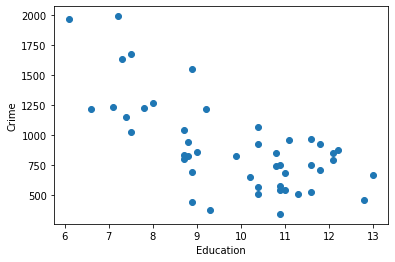

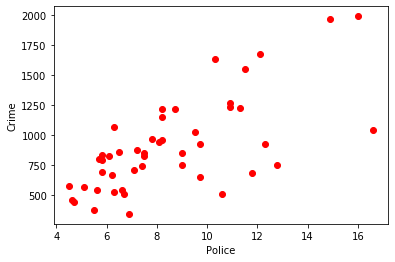

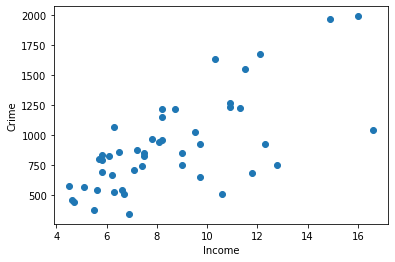

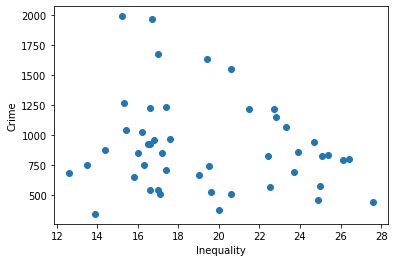

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
#  Question One create scatterplot
fig = plt.scatter(data['Education'], data['Crime'])

# add plot labels
plt.xlabel('Education')
plt.ylabel('Crime')
plt.show()

fig = plt.scatter(data['Police'], data['Crime'], c=['red'])

# add plot labels
plt.xlabel('Police')
plt.ylabel('Crime')
plt.show()

fig = plt.scatter(data['Police'], data['Crime'])

# add plot labels
plt.xlabel('Income')
plt.ylabel('Crime')
plt.show()

fig = plt.scatter(data['Inequality'], data['Crime'])

# add plot labels
plt.xlabel('Inequality')
plt.ylabel('Crime')
plt.show()


<ol start="2">
<li>Is the education variable positively or negatively correlated with crime? Is the police variable positively or negatively correlated with crime?</li>
</ol>

In [9]:

edu = np.array(data[data.columns[0]])
police = np.array(data[data.columns[1]])
crime = np.array(data[data.columns[4]])

print("covariance matrix edu: ", np.cov(edu,police))
edu_corr = np.corrcoef(edu,police)
print("correlation matrix: ", edu_corr)

print("covariance matrix police: ", np.cov(police,crime))
pol_corr = np.corrcoef(police,crime)
print("correlation matrix: ", pol_corr)


covariance matrix edu:  [[ 3.16583719 -2.28434783]
 [-2.28434783  8.83217391]]
correlation matrix:  [[ 1.         -0.43200039]
 [-0.43200039  1.        ]]
covariance matrix police:  [[8.83217391e+00 7.90345652e+02]
 [7.90345652e+02 1.49585384e+05]]
correlation matrix:  [[1.         0.68760446]
 [0.68760446 1.        ]]


In [14]:
print("pearsons correlation for education vs crime is : ",edu_corr[0,1])
print("Education is negatively correlated with crime, as education increases crime decreases")


pearsons correlation is :  -0.4320003893666552
Education is negatively correlated with crime, as education increases crime decreases


In [17]:
print("pearsons correlation for police vs crime is : ",pol_corr[0,1])
print("Police and crime have a positive correlation, as police presence increases so does crime")

pearsons correlation for police vs crime is :  0.6876044557069301
Police and crime have a positive correlation, as police presence increases so does crime


<ol start="3">
<li>Split the data in 2 halves: training set and test set</li>
</ol>

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)


<ol start="4">
<li>Fit a multivariate linear regression model on the training data using all the features available</li>
</ol>

In [46]:
from sklearn import linear_model
model = linear_model.LinearRegression()

model.fit(X_train, y_train);

<ol start="5">
<li>What are the intercept ($\theta_0$) and coefficients ($\theta_1$, $\theta_2$, $\theta_3$ and $\theta_4$) of the model?</li>
</ol>

In [47]:
print(model.intercept_)
print(model.coef_) 

[-1223.73299893]
[[-97.92443562  56.12936552   0.26580813  61.59070296]]


<ol start="6">
<li>What is the $R^2$ score (i.e. the coefficient of determination that measures the proportion of the outcomes variation explained by the model) for the training data? and for the test data?</li>
</ol>

In [48]:
print("Test model score ",model.score(X_test, y_test))
print("Training model score ",model.score(X_train, y_train))


Test model score  0.4678154812092654
Training model score  0.7317323225081351


<ol start="7">
<li>Given the following imaginary cities with the provided values for the predictors education, police, income and inequality, which city should have the highest level of crime according to your model?:</li>
</ol>

| City name        | education           | police  | income  | inequality |
| ------------- |:-------------:| -----:| -----:| -----:|
| City 1      | 10 | 5 | 6000  | 16   |
| City 2      | 8 | 11 | 4500  | 25   |
| City 3      | 6 | 8 | 3780  |  17  |
| City 4      | 12 | 6 | 5634  |  22  |

In [49]:
print("City2 has the highest crime rate")
city1 = np.array([[10, 5, 6000, 16]])
crime = model.predict(city1)
print("y predicted for city 1", crime)

city2 = np.array([[8, 11, 4500, 25]])
crime = model.predict(city2)
print("y predicted for city 2", crime)

city3 = np.array([[6, 8, 3780, 17]])
crime = model.predict(city3)
print("y predicted for city 3", crime)

city4 = np.array([[12, 6, 5634, 22]])
crime = model.predict(city4)
print("y predicted for city 4", crime)

City2 has the highest crime rate
y predicted for city 1 [[657.96952122]]
y predicted for city 2 [[1346.1987119]]
y predicted for city 3 [[689.55200672]]
y predicted for city 4 [[790.5084564]]


<ol start="8">
  
<li>Re-instantiate your linear regression model with the parameter `fit_intercept` set to `False` and rerun your analysis on the entire feature matrix $X$. When we set the `fit_intercept` to `False` we are basically fitting a model with no intercept parameter $\theta_0$. Output the coefficients you get for $\theta_1 ... \theta_4$.</li>
</ol>

In [54]:
from sklearn import linear_model
from numpy.linalg import inv
model = linear_model.LinearRegression(fit_intercept = False)

model.fit(X, y);
print(model.coef_)


[[-96.46202619  54.10073752   0.1449307   32.66288971]]


<ol start="9">
  
<li>Calculate the coefficients for $\theta_1 ... \theta_4$ using the analytical/close form solution of linear regression. Make sure those estimates coincide with what you get in Exercise 8 to be certain you got it right. Use the matrix algebra functionality provided by the `numpy` library to find the optimal vector **$\theta$**. Provide the line of code you created to calculate the solution.</li>
</ol>

In [55]:
#y = y.reshape((-1,1))
print(X.shape)
coeffs = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print(coeffs)

(47, 4)
[[-96.46202619]
 [ 54.10073752]
 [  0.1449307 ]
 [ 32.66288971]]


### Exercise on Linear Algebra **(Hard)**

The following code snippet generates a Matrix of 10 rows and 10 columns. Think of each row as a vector. 

In [1]:
import numpy as np
np.random.seed(20) # for reproducibility purposes
dim=10
M = np.random.random(dim*dim).reshape(dim,dim)
# M = np.array([[0,1,1],[1,3,3],[1,2,3]]) #Sanity check to use while you develop your solution

<ol start="10">
  
<li>Your task is to estimate the 2 row vectors that are most similar to each other in the entire matrix in terms of the direction in which they point in high dimensional space (i.e. vector magnitude should be irrelevant) . Let me give you a few hints:</li>
</ol>

- Normalize all the rows in the matrix (using the L2 norm)
- Dot product every row with every other row
- Extract the maximum result from the previous operation after accounting for the fact that the result is a symmetric matrix and that the numbers in the main diagonal are just the dot product of a vector with itself (So they should not count towards computing the maximum)
- Start working with a super simple matrix (i.e. ```M = np.array([[0,1,1],[1,3,3],[1,2,3]])```) to make sure your solution is correct before applying it to the large matrix



### Exercises on Classification

#### Business Churn Rate

"Churn Rate" is a business term describing the rate at which customers leave or cease paying for a product or service. It's a critical figure in many businesses. Understanding what keeps customers engaged is valuable. Consequently, there's growing interest among companies to develop better churn-detection techniques. Predicting churn is particularly important for businesses with subscription models such as cell phone or pay-TV who want to keep their clients and understand why clients leave their services. 

The data set we'll be using, `churn.csv`, is real data from a Telecommunications company customer data set. Each row represents a subscribing telephone customer. Each column contains customer attributes such as call minutes used during different times of day, charges incurred for services, lifetime account duration, etc. The last column is the label indicating whether the customer quit the service (1) or is still a customer of the telecom company (0). 

Your task is:

<ol start="11">
<li> Read the data from the file into the appropriate $X$ and $y$ data structures, shuffle the data and split the data into a training set and test set (test set size should be 33%)</li>
</ol>

In [93]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

data = pd.read_csv('churn.csv', index_col=0)
#print(data.head())
feature_col  = data.keys()
#feature_cols exclude account length as it is an id and would skew the data, and the last column is our target
feature_cols = feature_col[1:16]
#target is "label" which indicates whether the person is still a current customer
target = feature_col[17]
print("Feature X ",feature_cols)
print("Target y", target)
#Assign data from feature cols to X variable
X = np.array(data[feature_cols])
#assign data from target column, 'label'
y = np.array(data[target])
X, y = shuffle(X, y, random_state=1)

#print("***", np.array(data[feature_cols[1]]) )
#print("***", np.array(data[target]) )

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33)


Feature X  Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge'],
      dtype='object')
Target y label


<ol start="12">
<li> Scale the data using the StandardScaler class from `scikit-learn`</li>
</ol>    

In [94]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler().fit(X_train)
X_scaled = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)


print(X_scaled)


[[-0.3230358  -0.60477205 -0.57867525 ... -0.3642123   4.29810166
  -0.37023979]
 [-0.3230358   1.65351556  3.18818805 ... -0.0788738  -0.20035465
  -0.07961599]
 [-0.3230358  -0.60477205 -0.57867525 ...  0.77714171 -0.20035465
   0.77904524]
 ...
 [-0.3230358  -0.60477205 -0.57867525 ... -0.00753917 -0.60930522
  -0.01356513]
 [-0.3230358  -0.60477205 -0.57867525 ...  0.17079739  1.02649707
   0.17137729]
 [-0.3230358  -0.60477205 -0.57867525 ... -0.39987961 -0.20035465
  -0.39666013]]


<ol start="13">
<li> Train a logistic regression model and estimate its performance on the test data</li>
</ol>    

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#fit model to training data
model.fit(X_train, y_train)
#evaluate the model on unseen test data for accurate calc
score = model.score(X_test, y_test)
print(score)

0.8736363636363637


C:\Users\Bex.0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<ol start="14">
<li> Train a K-nearest neighbors classifier and estimate its performance on the test data</li>
</ol>
You can read about the K-nearest neighbors machine learning model in the scikit-learn documentation: 

[Nearest Neighbors Classification](https://scikit-learn.org/stable/modules/neighbors.html#classification) and 



[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
score = neigh.score(X_test, y_test)
print(score)

0.8836363636363637


### Exercise on Regularization

Using the Boston house prices [data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):

<ol start="15">
<li> Fit a linear regression model using Ridge regularization and print out the coefficients of the model </li>
<li> Fit a linear regression models using Lasso regularization and print out the coefficients of the model. Describe what is most striking difference between the coefficients of Ridge and Lasso regression. </li>
</ol>

I provide you with some initial code to get you started:

In [103]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import numpy as np
import pylab as pl

from sklearn.datasets import load_boston
boston = load_boston()

X = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X, y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 1.0000e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 1.0000e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 1.0000e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 1.0000e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 1.0000e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.0000e+00]] [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [107]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,y_train)
coef = reg.coef_
print(coef)
print(reg.intercept_)


[-1.10558458e-01  3.14754936e-02  1.92349682e-02  2.64289199e+00
 -1.22740970e+01  4.46102913e+00 -1.01408357e-02 -1.37755922e+00
  2.53447202e-01 -1.11693299e-02 -8.59180851e-01  1.25397346e-02
 -5.17928658e-01  0.00000000e+00]
26.891131575850398


In [106]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=.5)
reg.fit(X_train,y_train)
Lasso(alpha=0.1)
coef = reg.coef_
print(coef)
print(reg.intercept_)

[-0.09303407  0.03263992 -0.          0.         -0.          3.12988585
  0.         -0.91525478  0.23659632 -0.01303179 -0.72922874  0.01234997
 -0.64998372  0.        ]
26.57899239378358


### Exercise on Clustering

<ol start="17">

<li> Given the following artificial data set which is unlabeled, use the K-means algorithm included in scikit-learn using `n_clusters` parameter equals 3 to fit the data $X$ above and plot the data color coded for the estimated cluster each data point belongs to.
</li>
</ol>

[[ 4.28576743e-01  4.97399710e+00]
 [ 1.61990909e+00  6.76452867e-02]
 [ 1.43289271e+00  4.37679234e+00]
 [-1.57846247e+00  3.03445802e+00]
 [-1.65862863e+00  2.26746029e+00]
 [-1.52172727e+00  3.23408479e+00]
 [ 8.36856841e-01  2.13635938e+00]
 [ 2.41008767e-01  4.81040511e+00]
 [-2.10320664e+00  2.44201184e+00]
 [-4.83580407e-01  3.51451890e+00]
 [ 8.93499638e-01  1.01093082e+00]
 [ 2.39564169e+00  7.64058600e-01]
 [ 3.04414848e+00  9.96200313e-01]
 [ 1.24258802e+00  4.50399192e+00]
 [ 1.89462740e+00  2.20856861e-01]
 [-1.65707376e+00  3.18511821e+00]
 [ 1.21767506e+00  3.89290127e+00]
 [ 1.20212540e+00  3.64414685e+00]
 [-1.32356154e+00  4.13050840e+00]
 [ 1.34195197e+00  5.93573847e-01]
 [-1.79041773e+00  3.02668532e+00]
 [ 1.16411070e+00  3.79132988e+00]
 [ 1.36085437e+00  7.10288309e-01]
 [ 4.38990142e-01  4.53592883e+00]
 [-2.53563494e+00  2.38449945e+00]
 [-2.08499791e+00  2.81072881e+00]
 [ 3.47138300e-01  3.45177657e+00]
 [-2.14486518e+00  2.70791624e+00]
 [ 2.40238042e+00  1

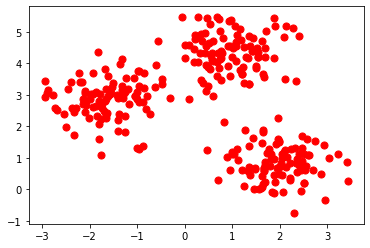

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=3,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50, c='red');
print(X)

Your final plot should look something like the following figure with the colors indicating cluster membership as determined by the algorithm:

![](./kmeansResult.png)

[2 1 2 0 0 0 1 2 0 0 1 1 1 2 1 0 2 2 0 1 0 2 1 2 0 0 2 0 1 1 0 2 2 1 1 0 1
 0 2 1 0 1 2 1 1 0 1 0 0 1 0 1 0 0 1 2 2 0 0 2 1 1 2 0 1 0 2 1 2 1 0 0 0 0
 1 2 1 0 2 2 0 2 1 2 2 2 1 0 2 2 0 1 0 2 1 1 2 1 0 2 1 0 2 1 2 2 0 2 1 1 2
 0 2 2 0 0 2 2 1 1 1 0 1 1 1 0 1 1 1 0 0 0 2 0 0 1 0 2 0 0 1 2 1 2 0 0 2 0
 0 1 2 0 2 1 0 0 1 1 2 1 2 2 1 2 0 2 2 2 2 0 1 2 0 1 1 1 2 1 2 2 1 0 2 2 2
 2 1 0 2 0 2 2 1 1 0 2 1 0 2 0 1 0 2 0 1 0 2 0 2 1 2 2 0 1 1 1 1 2 0 1 2 1
 1 1 2 0 0 2 2 0 2 1 1 2 1 0 0 0 2 2 1 0 0 0 0 1 0 0 2 1 1 2 1 1 0 2 1 0 2
 2 0 2 0 0 2 0 2 1 1 1 1 2 2 2 2 2 0 0 1 2 2 1 1 1 0 1 0 0 1 1 0 0 0 1 2 2
 0 1 2 0]


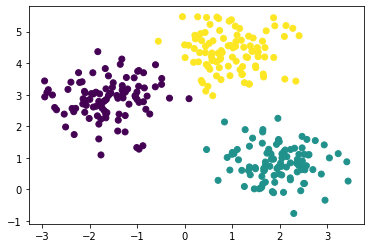

In [125]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=8) #You guess there are 3 groups in the data
y_predicted = kmeans.fit(X).labels_ #y_predicted contains the estimated group belonging of each data point
plt.scatter(X[:,0], X[:,1], c=y_predicted);
print(y_predicted)

### Exercise on Dimensionality Reduction

<ol start="18">

<li> We first create 200 random two-dimensional data points. The data points are sampled from a multinomial normal distribution.
You don't have to understand precisely how to do this. Simply understand that the following code snippet creates some synthetic data. Use PCA to find out the 2 principal components of the data in `X`. Please, print out (numerically) those 2 components and the percentage of variance explained by each one of those components.
</li>
</ol>

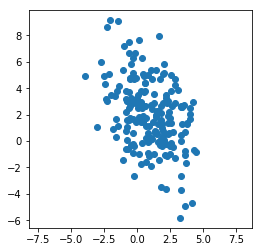

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(seed=3)
Cov = np.array([[2.9, -2.2], [-2.2, 6.5]])
X = np.random.multivariate_normal([1,2], Cov, size=200)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1])
plt.axis('equal') # equal scaling on both axis;
plt.show()

### Exercises on Scraping information from the web

<ol start="19">

<li> Build  a web spider using [Scrapy](https://scrapy.org) that automatically scrapes all the links to Dunedin properties for sale in https://www.trademe.co.nz   
Use the following start URL: <a href="https://www.trademe.co.nz/Browse/CategoryAttributeSearchResults.aspx?search=1&cid=3399&rptpath=350-&sidebar=0&132=PROPERTY&selected135=&selected136=&134=&135=&29=&122=0&122=0&49=0&49=0&153=Dunedin%2c+otago&searchString=Dunedin%2c+otago">Properties for sale in Dunedin</a>

Crawl the index pages and also crawl each individual property listing. From each individual property listing extract:
- title
- price
- description
- address 

Store the results of the crawling into a `CSV` file which should look similar to the following:

### Exercise on getting data from an API

<ol start="20">

<li> Using the Twitter API and the twitter Python module, programmatically retrieve and print out the latest 5 tweets from the account NASA (@NASA). Make sure to include your own keys to the twitter API in the code snippet you provide.
</li>
</ol>

In [11]:
!pip install python-twitter
import twitter
#use your own API credentials here

api = twitter.Api(consumer_key="Y9hK7N96Hogs7DFHZsJoElexN",
                  consumer_secret="bS3zqk8a3HeH4kE8wvPGRhURGCYpGoUbInn5385XT7e8bj6GBa",
                      access_token_key="1240263635013795841-MHUYfuLe3VWyT8vkcFPQ1pShCKWJXQ",
                  access_token_secret="BYKtyB7CCbTJm58KXSSrAdguzcwsJpkszh0MXShxeHY1c")
import pandas as pd
## get the user timeline with screen_name = '@NASA'
twitter_statuses = api.GetUserTimeline(screen_name = '@NASA')
pdSeriesList = [pd.Series(t.AsDict()) for t in twitter_statuses]
data = pd.DataFrame(pdSeriesList)
last5 = data.head(5)
tweets = last5.text
text = tweets.values
n = 0
for tweet in text:
    n = n+1
    print('\n *', n, tweet)
    


 * 1 At @NASAArmstrong, telemetry testing was successfully completed for our first all-electric X-plane. The tests confi… https://t.co/xL2orwCcUV

 * 2 RT @AsteroidWatch: Have you been hearing about asteroid 1998 OR2’s close approach on April 29? Rest assured that this asteroid will safely…

 * 3 Grab a cozy blanket. It's Astronaut Story Time from Earth!

TODAY &amp; each weekday at 4pm ET, astronaut Christina Koc… https://t.co/s1m46oiRT0

 * 4 @BarbaraWLewis @stephanieruns @ISS_Research Thank you for sharing! Yes, we're constantly adding new material. We're… https://t.co/d2yeBaN85W

 * 5 RT @MarsCuriosity: Working remotely? I can relate. I've been doing just that since my launch to Mars in November 2011. Now the rest of the…


## Exercise on Natural Language Processing

Go over the following tutorial about classifying test [Working With Text Data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#loading-the-20-newsgroups-dataset)
The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. 
Let's download the data.

In [12]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test',categories=categories, shuffle=True, random_state=42)

<ol start="21">

<li>
Using a CountVectorizer, transform the text into vector counts. Fit a Multinomial Naive Bayes classifier to the training data. Carry out predictions on the the test data an estimate the classification accuracy of the classifier on the test data.  Use your classifier to predict the category of the following three sentences:
</li>
</ol>

```
docs_new = ['God commands christians to love their neighbors', 'OpenGL on the GPU is fast',
            'the prevalence of diabetes in the population is growing' ]
```


In [28]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print(count_vect.vocabulary_.get(u'algorithm'))

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

print(X_train_tf.shape)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

docs_new = ['God commands christians to love their neighbors', 'OpenGL on the GPU is fast',
            'the prevalence of diabetes in the population is growing' ]
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
print(predicted)
for doc, category in zip(docs_new, predicted):
     print('%r => %s' % (doc, twenty_train.target_names[category]))
#clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
4690
(2257, 35788)
[3 1 2]
'God commands christians to love their neighbors' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics
'the prevalence of diabetes in the population is growing' => sci.med


<ol start="22">

<li> Using the off-the-shelf `TextBlob` NLP library tokenize the following text snippet into sentences, carry out computational sentiment analysis on each sentences and also translate each sentence into French</li>
</ol>

```
Donald Trump is a piece of shit. What are you talking about????? Donald Trump is the best president in the history of the United States
```

In [63]:
text = """Donald Trump is a piece of shit. What are you talking about????? Donald Trump is the best president in 
the history of the United States"""


### Deliverables

<ol start="23">

<li> You should hand in a single python notebook file (.ipynb) containing all the necessary code to answer each of the previously enumerated tasks. Include comments in the code to clarify which exercise your code snippet is trying to solve. Use separate code cells to organize your code. Use comments also to provide answers to each task when appropriate.  Please, make sure your code runs smoothly so I can execute it in my computer. Name your Python notebook according to the following pattern: `yourLastName_DSMI_A1.ipynb`. Create your own private repository for you to work on the assignment by using the following link: 
</li></ol>    

[https://classroom.github.com/a/yh2iWeTo](https://classroom.github.com/a/yh2iWeTo)

The notebook file and the data files should then be available in your own private GitHub repository “https://github.com/OPClasses2/assignment1-YourGithubUserName”. 
